In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import cufflinks as cf
import seaborn as sns

print(__version__)

5.15.0


In [2]:
#read data as df
df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [4]:
df.shape

(16719, 16)

In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [6]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum() #checking for null values

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [8]:
columns_to_drop=['Critic_Score','Critic_Count','User_Score','User_Count','Developer', 'Publisher']
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Name,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN


In [9]:
df.set_index('Name', inplace=True)

In [10]:
df.head()

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating
Name,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,E
Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN
Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,E
Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,E
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN


In [11]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [12]:
df['Rating'].fillna('Unknown', inplace=True)

In [13]:
df.head(20)

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating
Name,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,E
Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,Unknown
Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,E
Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,E
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,Unknown
Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,30.26,Unknown
New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,29.80,E
Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,28.92,E
New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,28.32,E


In [14]:
print('Feature name || Total missing values')
print(df.isna().sum())

Feature name || Total missing values
Platform             0
Year_of_Release    269
Genre                2
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
Rating               0
dtype: int64


In [15]:
df.shape

(16719, 9)

In [16]:
genre_group=df['Genre'].value_counts().sort_index()
genre_group

Genre
Action          3370
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1500
Shooter         1323
Simulation       874
Sports          2348
Strategy         683
Name: count, dtype: int64

In [17]:
x=genre_group.index
y=genre_group.values


In [18]:
#Scatter_Plot

# Perform the iplot to get the Plotly figure object
fig = genre_group.iplot(
    kind='scatter',
    mode='lines+markers',
    title='Genre Distribution',
    xTitle='Categories',
    yTitle='Number of Games',
    dimensions=(1000, 500),
    asFigure=True
)

# Extracting data from the Plotly figure object
x = fig['data'][0]['x']
y = fig['data'][0]['y']

# Add the additional scatter plot trace
fig.add_trace(go.Scatter(x=['Genre'], mode='markers', name='Genre Distribution',
                         marker=dict(color='red', size=10), showlegend=True,
                         text=['Genre Distribution'], textposition='bottom center'))

# Plot the modified figure using iplot
iplot(fig)


In [19]:
platform=df['Platform'].value_counts().sort_index()
platform

Platform
2600     133
3DO        3
3DS      520
DC        52
DS      2152
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      393
PSP     1209
PSV      432
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: count, dtype: int64

In [20]:
m=platform.index
n=platform.values

# Create the bar trace
trace = go.Bar(
    x=m,
    y=n,
    marker=dict(color='rgba(80, 26, 80, 0.8)'),
    hoverinfo='x+y+text',
)

# Define layout
layout = go.Layout(
    title='Platform Distribution',
    xaxis=dict(title='Categories'),
    yaxis=dict(title='Number of users'),
    showlegend=False,
    width=1200,
    height=500,
    xaxis_tickangle=-45,
)

fig = go.Figure(data=[trace], layout=layout)

# Plot using iplot
iplot(fig)


In [21]:
rating=df['Rating'].value_counts().sort_index()
rating

Rating
AO            1
E          3991
E10+       1420
EC            8
K-A           3
M          1563
RP            3
T          2961
Unknown    6769
Name: count, dtype: int64

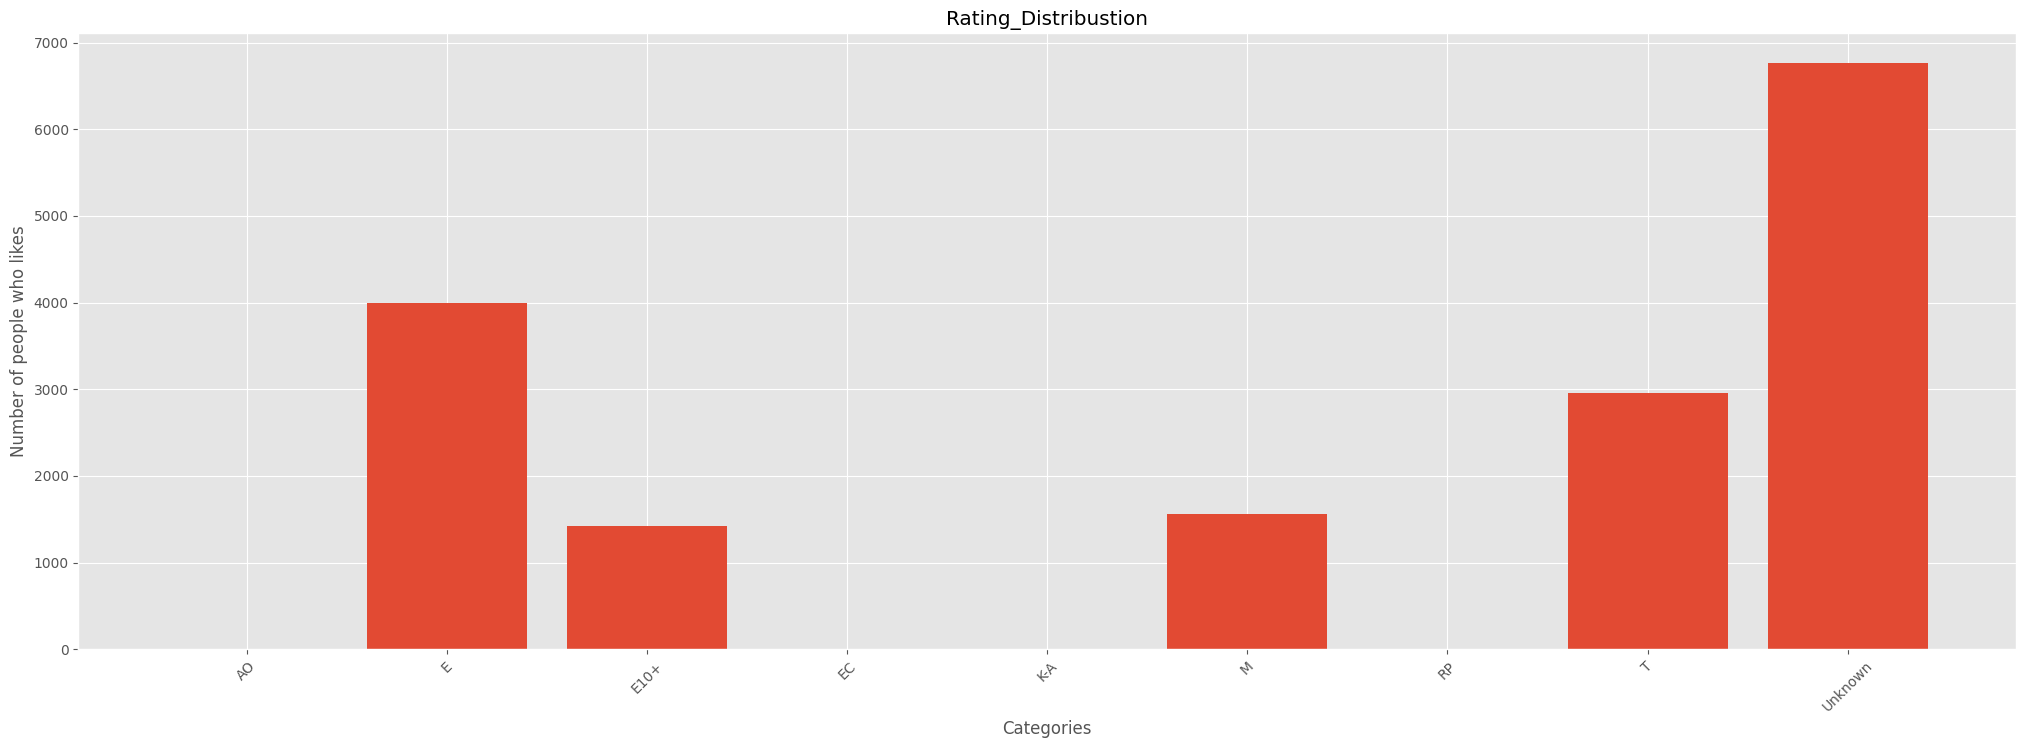

In [22]:

u=rating.index
v=rating.values
plt.style.use("ggplot")
plt.figure(figsize=(25,8))
plt.bar(u,v)
plt.title("Rating_Distribustion")
plt.xlabel("Categories")
plt.ylabel("Number of people who likes")
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Year_of_Release', ylabel='Rating'>

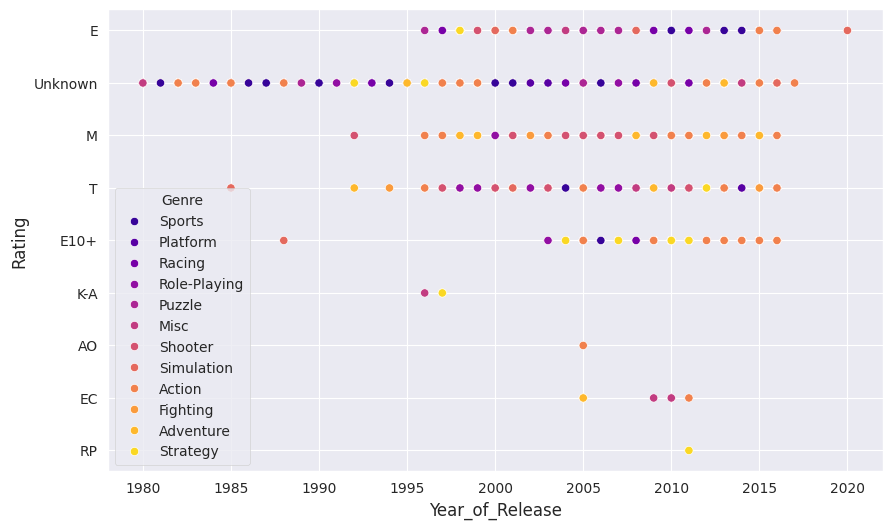

In [23]:
df.reset_index(drop=True, inplace=True)  # Reset the index without creating a new column for the old index
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Year_of_Release", y="Rating",hue="Genre",palette='plasma')

<Figure size 1000x2000 with 0 Axes>

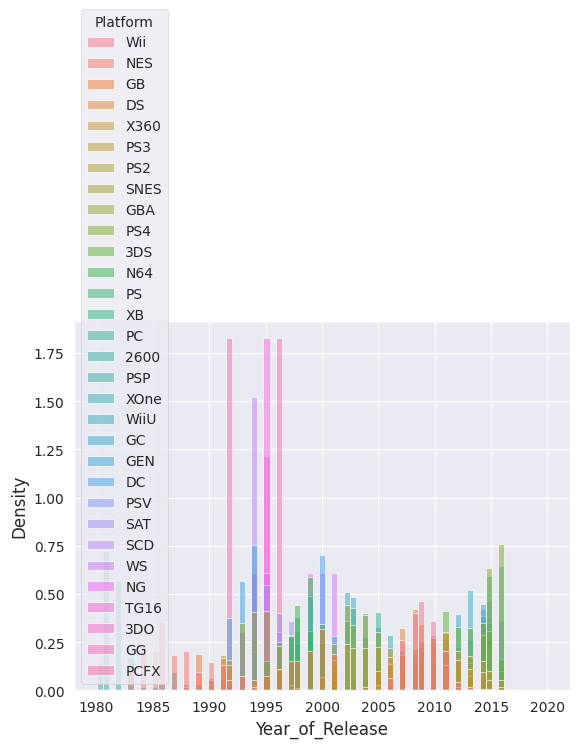

<Figure size 1000x2000 with 0 Axes>

In [24]:
sns.histplot(df , x='Year_of_Release', hue="Platform",stat='density',common_norm=False)
plt.figure(figsize=(10, 20))


<Figure size 2000x3000 with 0 Axes>

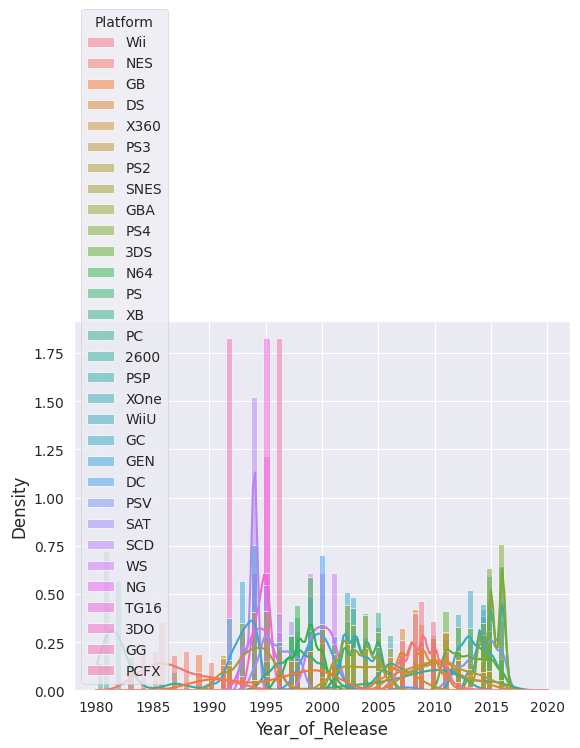

<Figure size 2000x3000 with 0 Axes>

In [25]:

# Histogram
sns.histplot(df , x='Year_of_Release', hue="Platform",kde=True,stat='density',common_norm=False)
plt.figure(figsize=(20, 30))



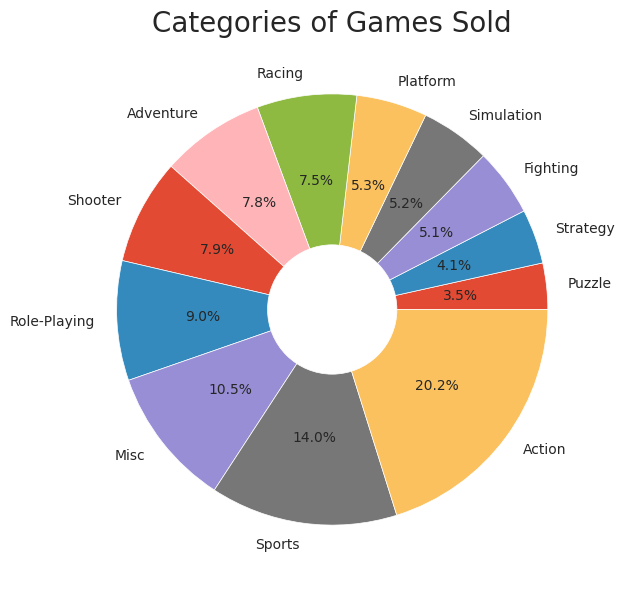

In [26]:
#piechart

# here we groupby the genre and get the total number of sales globally
game = df.groupby("Genre")["Global_Sales"].count().sort_values()

# plotting
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, autopct='%1.1f%%')
central_circle = plt.Circle((0, 0), 0.3, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Categories of Games Sold", fontsize=20)
#plt.legend(genre_group.index)
plt.show()

Genre
Action          1745.27
Sports          1332.00
Shooter         1052.94
Role-Playing     934.40
Platform         828.08
Misc             803.18
Racing           728.90
Fighting         447.48
Simulation       390.42
Puzzle           243.02
Adventure        237.69
Strategy         174.50
Name: Global_Sales, dtype: float64


<ipython-input-27-7cdc76af32e1>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




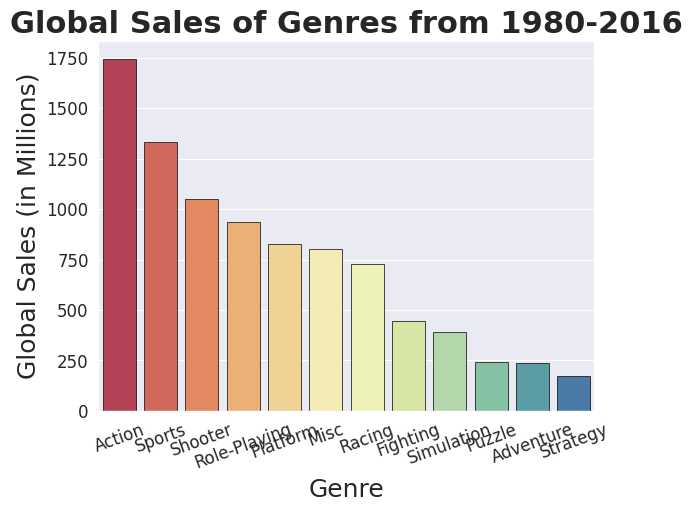

In [27]:

genre_global_sales = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)

print(genre_global_sales)

sns.barplot(x=genre_global_sales.index, y=genre_global_sales.values, ec='Black', palette='Spectral')
plt.xticks(rotation=20, fontsize=12)
plt.xlabel('Genre', fontsize=18)
plt.ylabel('Global Sales (in Millions)', fontsize=18)
plt.title('Global Sales of Genres from 1980-2016', fontweight='bold', fontsize=22)

plt.show()

<ipython-input-28-8014abb9e235>:11: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-28-8014abb9e235>:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-28-8014abb9e235>:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




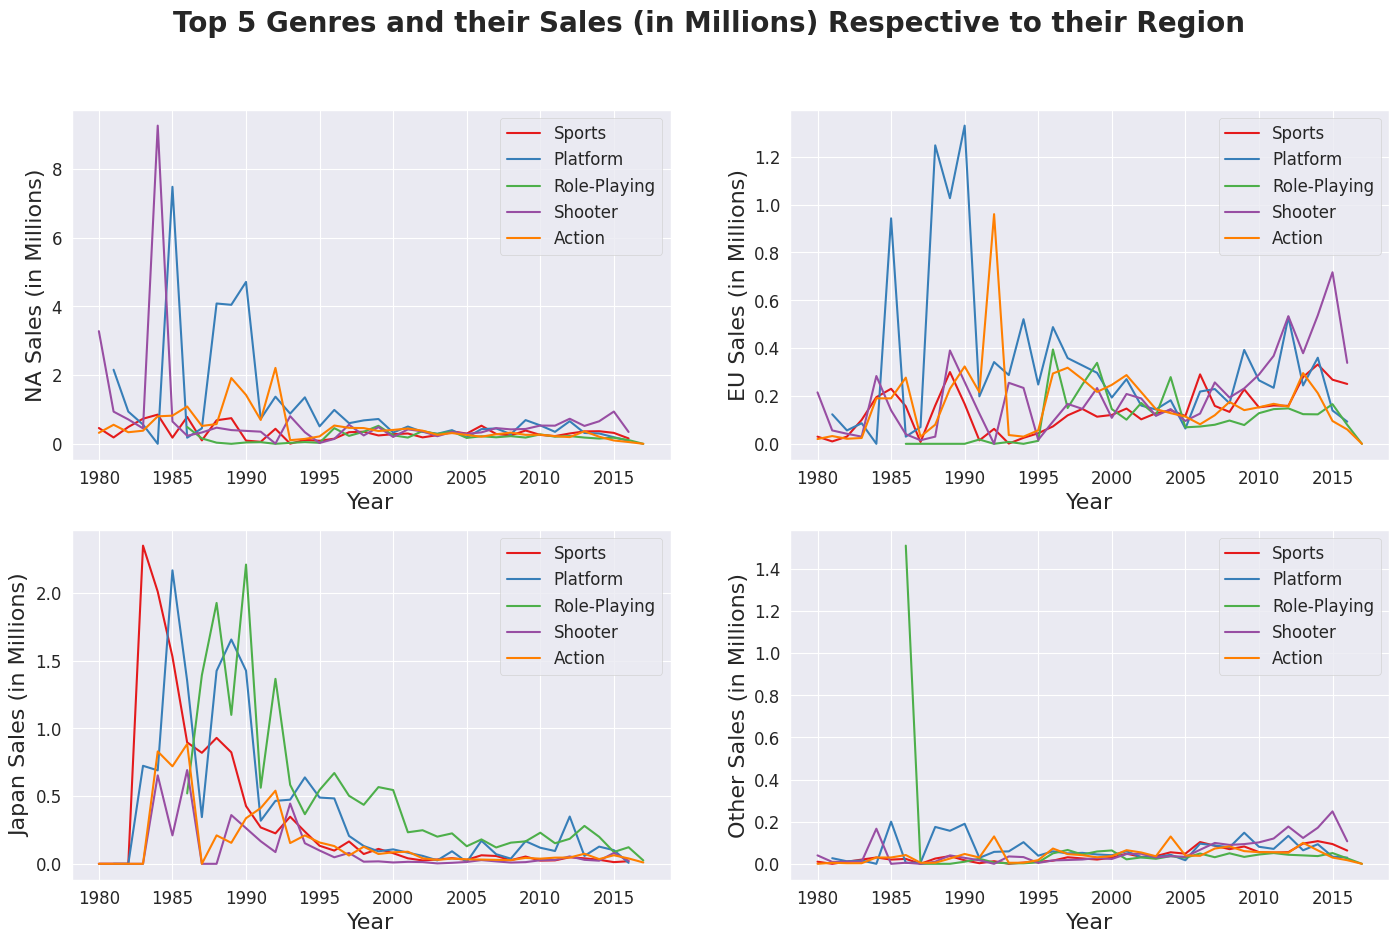

In [28]:
#line
top5_genres_list = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5).index

top5_genre_df = df[df['Genre'].isin(top5_genres_list)].reset_index(drop=True)  # Reset index to ensure unique labels

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(17, 10))

fig.suptitle('Top 5 Genres and their Sales (in Millions) Respective to their Region', fontsize=20, fontweight='bold')

sns.lineplot(x='Year_of_Release', y='NA_Sales', hue='Genre', data=top5_genre_df, errorbar=None, ax=ax0, palette='Set1')
sns.lineplot(x='Year_of_Release', y='EU_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax1, palette='Set1')
sns.lineplot(x='Year_of_Release', y='JP_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax2, palette='Set1')
sns.lineplot(x='Year_of_Release', y='Other_Sales', hue='Genre', data=top5_genre_df, ci=None, ax=ax3, palette='Set1')

for ax in [ax0, ax1, ax2, ax3]:
    ax.legend(loc='upper right')
    ax.set_xlabel('Year', fontsize=16)

ax0.set_ylabel('NA Sales (in Millions)', fontsize=16)
ax1.set_ylabel('EU Sales (in Millions)', fontsize=16)
ax2.set_ylabel('Japan Sales (in Millions)', fontsize=16)
ax3.set_ylabel('Other Sales (in Millions)', fontsize=16)

plt.show()



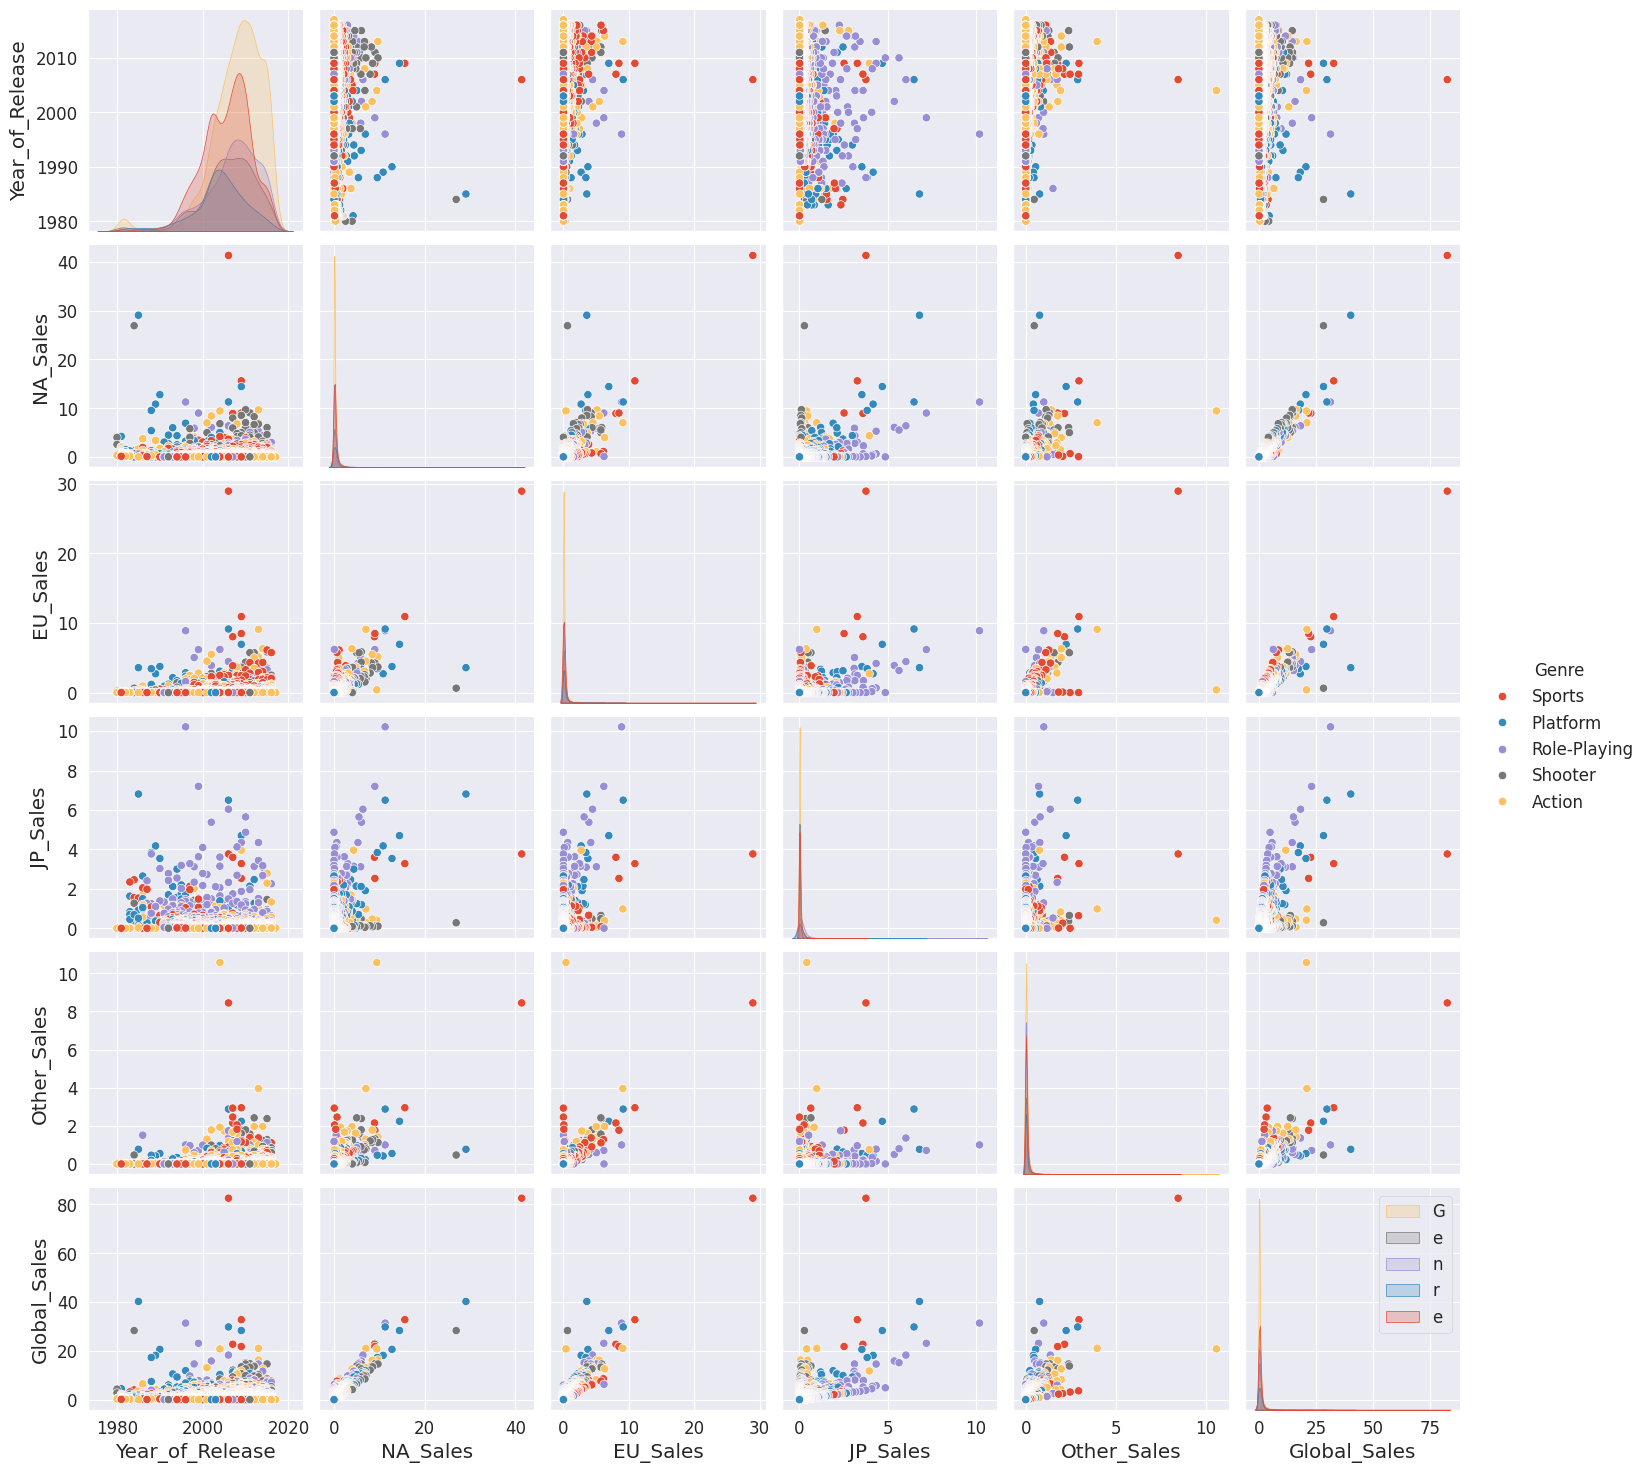

In [29]:
sns.pairplot(data = top5_genre_df, hue= 'Genre')
plt.legend('Genre')



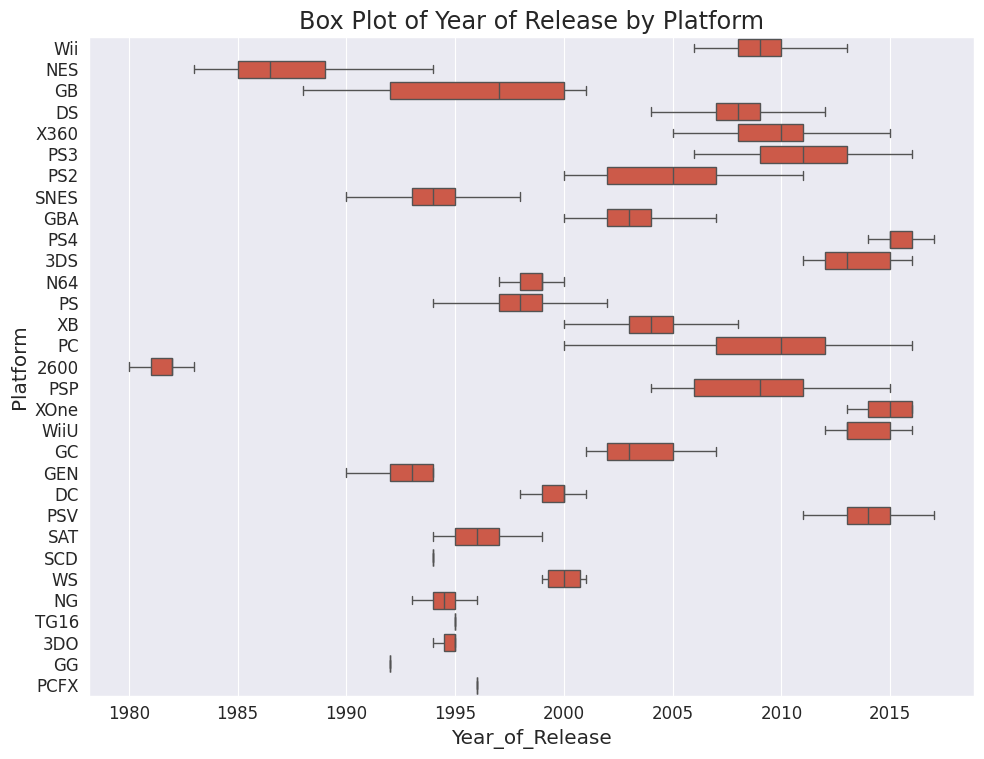

In [30]:

#Box
top_platforms = df["Platform"].value_counts().sort_values(ascending=False).index.values

# Set the figure size with more height to increase space between y-axis ticks
plt.figure(figsize=(10, len(top_platforms) * 0.25))
# Plotting without outliers
sns.boxplot(y="Platform", x="Year_of_Release", data=df[df["Platform"].isin(top_platforms)], orient="h", showfliers=False)

plt.xlabel("Year_of_Release")
plt.ylabel("Platform")
plt.title("Box Plot of Year of Release by Platform")

plt.tight_layout()
plt.show()

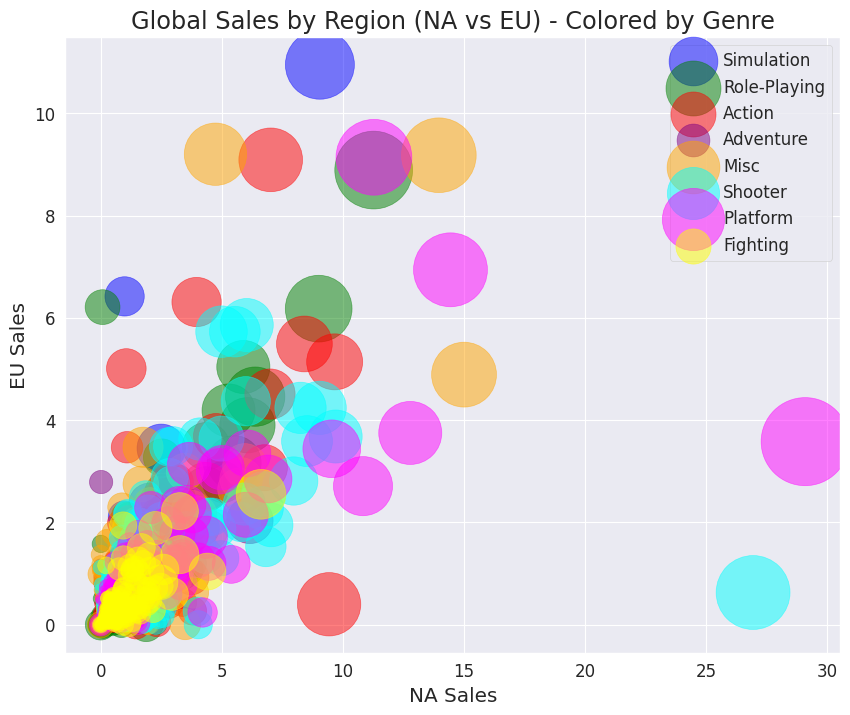

In [31]:


# Set up the plot
plt.figure(figsize=(10, 8))

# Create a dictionary to map each genre to a unique color
genre_color_map = {
    'Simulation': 'blue',
    'Role-Playing': 'green',
    'Action': 'red',
    'Adventure': 'purple',
    'Misc': 'orange',
    'Shooter': 'cyan',
    'Platform': 'magenta',
    'Fighting': 'yellow'
}

# Create the bubble plot
for genre, color in genre_color_map.items():
    genre_data = df[df['Genre'] == genre]
    plt.scatter(genre_data['NA_Sales'], genre_data['EU_Sales'] ,s=genre_data['Global_Sales']*100, alpha=0.5, label=genre, c=color)

# Set titles and labels
plt.title('Global Sales by Region (NA vs EU) - Colored by Genre')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')

# Add legend
plt.legend()

# Show the plot
plt.show()


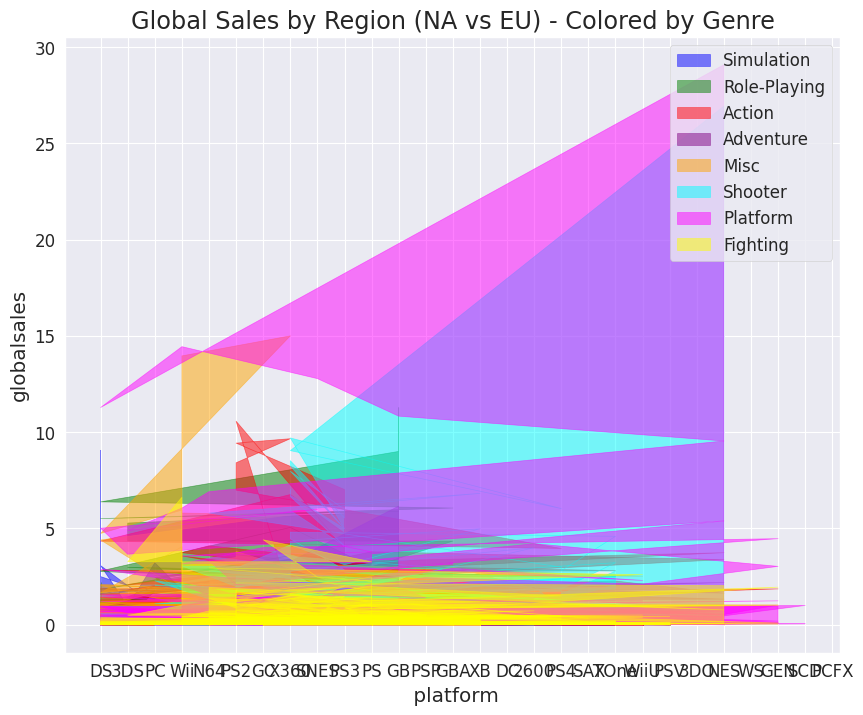

In [32]:


bubble_size = df['Global_Sales']

# Set up the plot
plt.figure(figsize=(10, 8))
genre_color_map = {
    'Simulation': 'blue',
    'Role-Playing': 'green',
    'Action': 'red',
    'Adventure': 'purple',
    'Misc': 'orange',
    'Shooter': 'cyan',
    'Platform': 'magenta',
    'Fighting': 'yellow'
    # Add more genres and colors as needed
}

for genre, color in genre_color_map.items():
    genre_data = df[df['Genre'] == genre]
    plt.fill_between(genre_data['Platform'], genre_data['Other_Sales'],genre_data['NA_Sales'], genre_data['EU_Sales'], label=genre, color=color, alpha=0.5)

# Set titles and labels
plt.title('Global Sales by Region (NA vs EU) - Colored by Genre')
plt.xlabel(' platform')
plt.ylabel('globalsales')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [33]:
#area
import plotly.express as px

fig = px.area(df, x=['Platform','Rating'], y='Year_of_Release',
              color='Genre',
              labels={'value': 'Sales (in Millions)', 'Year_of_Release': 'Year'})
fig.update_layout(title='Genres and their Sales (in Millions) Respective to their Region',
                  title_font_size=20,
                  xaxis_title='Plateform', yaxis_title='Sales (in Millions)')
fig.show()




